<a href="https://colab.research.google.com/github/PHandradee/Portfolio-Previs-o-de-Vendas-com-ARIMA-e-outros-algoritmos/blob/main/Previsao_de_Vendas_com_ARIMA_e_Outros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando os Dados

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Acesso ao drive 
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Teste Vaga DS/Dataset_teste_Just_BI.csv", delimiter = ';')
df.head(10)



,customer_id,customer_acquisition_channel,year,week,net_revenue,gross_revenue,boxes
0,206461,Paid Marketing,2014,W09,71,71,2
1,462640,Paid Marketing,2015,W25,28,56,10
2,666461,Referral,2015,W50,40,40,1
3,183202,Referral,2013,W42,18,37,1
4,410993,Referral,2014,W29,0,37,1
5,80002,Referral,2014,W11,23,37,1
6,400203,Referral,2014,W25,0,37,1
7,594692,Paid Marketing,2015,W22,84,84,1
8,217961,Paid Marketing,2013,W52,37,37,1
9,118941,Referral,2014,W03,37,37,1


In [ ]:
df['customer_acquisition_channel'].unique()

array(['Paid Marketing', 'Referral'], dtype=object)

No conjunto de dados tem as variáveis:



*   Customer ID: ID do cliente
*   Customer Acquisition Channel: Canal de compra podendo ser "Paid Marketing" ou Referral"
*   Year: Ano da compra
*   Week: Semana da compra
*   Net Revenue: Receita proveniente das vendas após ter pago todos os custos (Receita Líquida)
*   Gross Revenue: Receita Bruta 
*   Boxes: Quantidade de caixas compradas (quantidade de itens)



# Análise Exporatória

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715875 entries, 0 to 715874
Data columns (total 7 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   customer_id                   715875 non-null  int64 
 1   customer_acquisition_channel  715875 non-null  object
 2   year                          715875 non-null  int64 
 3   week                          715875 non-null  object
 4   net_revenue                   715875 non-null  int64 
 5   gross_revenue                 715875 non-null  int64 
 6   boxes                         715875 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 38.2+ MB


Variáveis Categóricas: customer_acquisition_channel, year e week.


Variáveis Numéricas: net_revenue, gross_revenue e boxes.

**Objetivos**: 

- Aponte resultados de vendas por ano: Gross Revenue, Net Revenue, Boxes (em Gráfico e Tabela)
-Qual customer_acquision_channel teve maior Ticket Médio em 2013 e em 2015?
- Número de clientes únicos por Ano e comparativo desse resultado 2013x2015 (em gráfico e tabela)
- Faça a projeção de net_revenue para 6 meses futuros 

Variável alvo é net_revenue, pois será ela que vou estimar para os 6 meses futuros.

In [ ]:
df.describe()

,customer_id,year,net_revenue,gross_revenue,boxes
count,715875.000000,715875.000000,715875.000000,715875.000000,715875.000000
mean,323664.862498,2014.196999,36.415437,41.430585,1.034710
std,186136.720066,0.754568,13.646022,9.752502,0.190494
min,103.000000,2013.000000,0.000000,14.000000,1.000000
25%,159325.000000,2014.000000,37.000000,37.000000,1.000000
50%,289541.000000,2014.000000,37.000000,37.000000,1.000000
75%,476431.000000,2015.000000,37.000000,40.000000,1.000000
max,746721.000000,2015.000000,532.000000,532.000000,17.000000


- Temos dados de um período de 2013 a 2015
- A média de caixas vendidas é de 1,03, tendo no máximo 17 unidades vendidas em um único pedido.
- A média de Receita Líquida(Net_revenue) é de 36.41, sendo o seu valor mínimo 0 e o valor máximo 532 
  
  **--- PONTO DE ATENÇÃO 1 : Tiveram uma ou mais vendas com 0 de Receita líquida**
- A média de receita bruta é de 41.43, tendo um valor mínimo de 14 e máximo de 532. 


## Distribuição das Variáveis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f88580db950>,
      dtype=object)

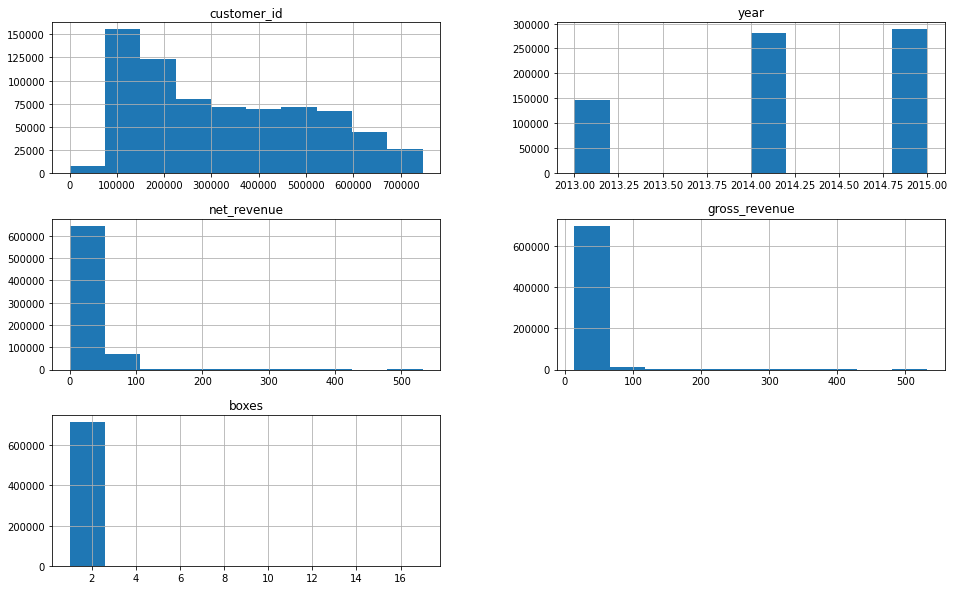

In [ ]:
df.hist(figsize=(16,10))

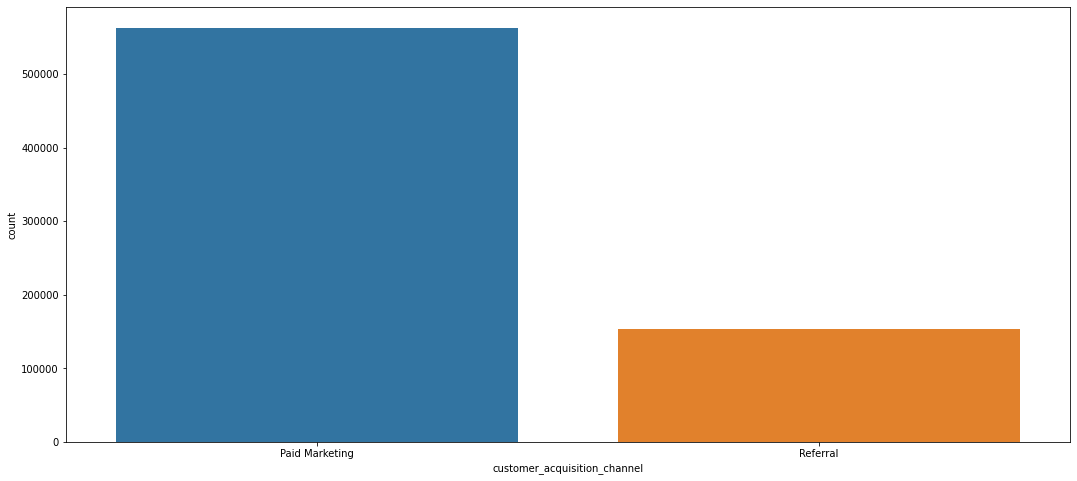

In [ ]:
sns.countplot(data=df,x='customer_acquisition_channel')

- A distribuição da variável ano(year) mostra que grande parte dos pedidos foram feitos em 2014 e 2015, tendo 2015 um pouco a mais de pedidos do que 2014
- Na distribuição da Receita Líquida(net_revenue) percebe-se que a maioria dos pedidos estão concentrados entre aproximadamente 0 a 50 de Receita Líquida, fora isso o maior intervalo é de 50 a 100, tendo valores quase que irrelevantes maiores do que 100.
- A receita bruta segue o mesmo padrão da receita líquida, tendo sua maioria de pedidos concentrados entre aproximadamente 10 a 60 de Receita Bruta.
- Para a quantidade de caixas percebe-se que a maioria esmagadora dos pedidos são de 1 a 2 caixas, aproximadamente.
- Percebemos que o meio de compra Dominante é o Paid Marketing

## Ponto de atenção 1:

Vejamos se é comum ter 0 de receita líquida ou se foi um caso esporádico.

In [ ]:
df_patencao1 = df[df['net_revenue'] == 0]
df_patencao1

,customer_id,customer_acquisition_channel,year,week,net_revenue,gross_revenue,boxes
4,410993,Referral,2014,W29,0,37,1
6,400203,Referral,2014,W25,0,37,1
33,544201,Referral,2015,W07,0,37,1
36,108921,Referral,2013,W20,0,37,1
42,681562,Referral,2015,W41,0,40,1
...,...,...,...,...,...,...,...
715848,746042,Referral,2015,W52,0,40,1
715855,659510,Referral,2015,W37,0,40,1
715858,237881,Paid Marketing,2014,W15,0,37,1
715864,202762,Paid Marketing,2015,W09,0,37,1


In [ ]:
(27361 / 715875) * 100

3.8220359699668234

Percebe-se que tem 27361 vendas(pedidos) que estão com Receita Líquida Zerada.
Isso representa **3,82%** de vendas de todo o período

Vamos olhar melhor essa situação para melhor entendimento, vamos considerar:

- Algum cliente fez mais de 1 pedido com 0 de Receita Líquida?
- Qual o canal de venda mais comum com 0 de Receita líquida?
- Em qual ano tiveram mais ocorrências?

### Algum cliente fez mais de 1 pedido com 0 de Receita Líquida?

In [ ]:
df_patencao1['customer_id'].duplicated().sum()

1317

In [ ]:
df_patencao1_comDup = df_patencao1[df_patencao1['customer_id'].duplicated()]

In [ ]:
df_patencao1_comDup['customer_id'].value_counts()

454861    21
72930     19
359610    18
548661    16
159351     9
          ..
395490     1
543520     1
170273     1
694700     1
527582     1
Name: customer_id, Length: 1020, dtype: int64

Observando os dados, temos 1020 clientes que compraram mais de uma vez e que a Receita Líquida é 0.

O Cliente que mais comprou é do Id 454861 e tem 21 pedidos.

### Qual o canal de venda mais comum com 0 de Receita líquida?

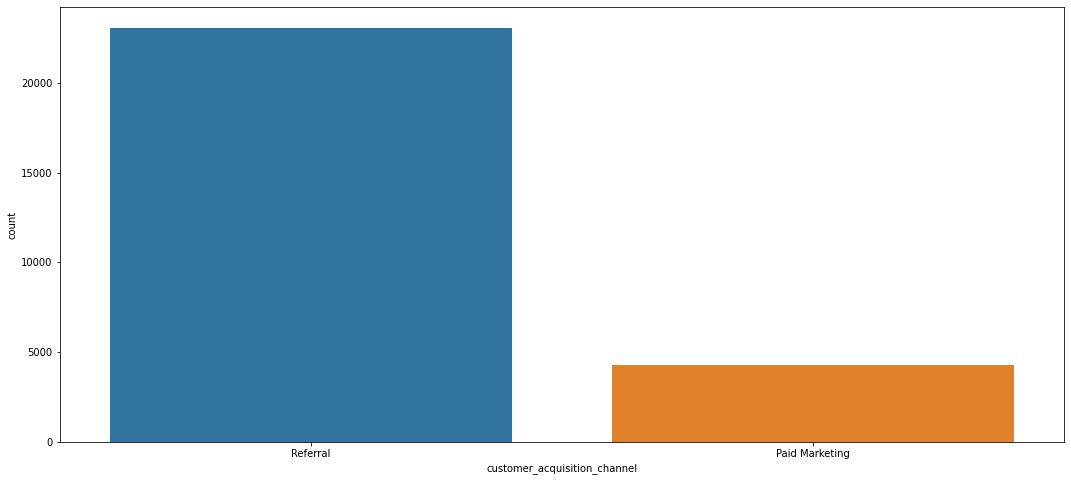

In [ ]:
sns.countplot(data=df_patencao1,x='customer_acquisition_channel')

O canal de venda mais comum com receita líquida 0 é o Referral.

### Em qual ano tiveram mais ocorrências?

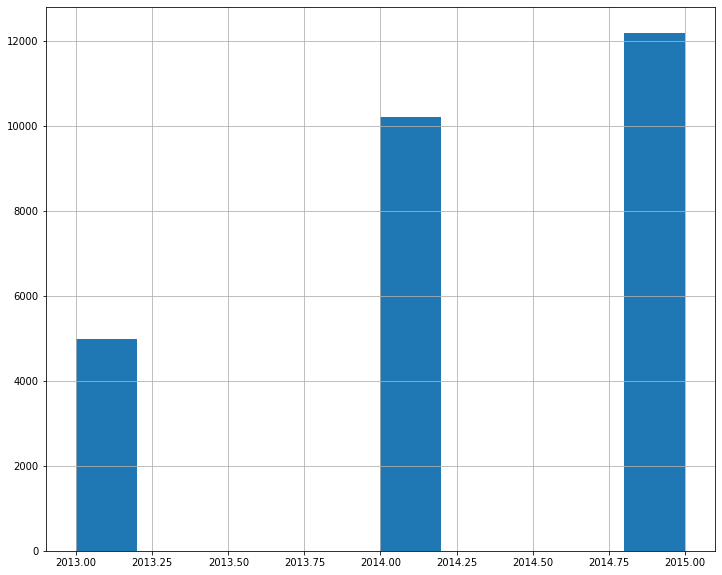

In [ ]:
df_patencao1['year'].hist(figsize=(12,10))

Para o ano temos a mesma distribuição quando considerado todos os dados, com o ano de 2015 sendo maior.

### Conclusão do Ponto de atenção 1

Observando os dados, concluímos que quase 4% de todos os pedidos entre o período de 2013 e 2015 tem a Receita Líquida Zerada.

Estes pedidos foram feitos majoritariamente por Referral, mas tem um número relevante que foram feitos por Paid Marketing.

Desses 4% de pedidos com Receita Líquida zerada(cerca de 27361 pedidos) 1317 pedidos foram feitos por clientes que compraram mais de uma vez, no qual equivale a 4,8% e estes 1317 pedidos foram feitos por 1020 clientes diferentes, tendo alguns clientes que compraram mais de 5 vezes nestas condições, o cliente que mais comprou fez 27 pedidos com Receita Líquida Zerada.

É recomendada uma análise mais profunda apenas destes casos, para entender melhor o que acontece e os padrões.



## Analisando se há correlação

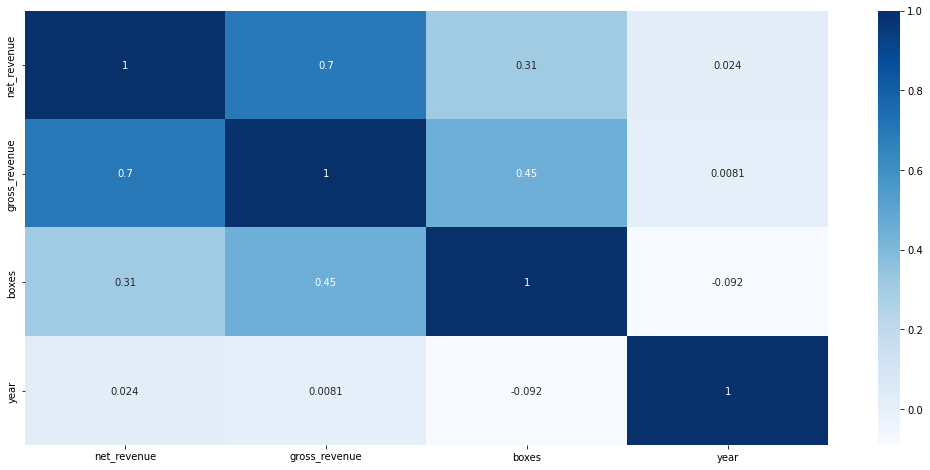

In [ ]:
df_cont=df[['net_revenue','gross_revenue','boxes','year']] 
sns.heatmap(df_cont.corr(),annot = True, cmap='Blues')

Observando as correlações percebemos que há uma correlação positiva intermediária entre gross_revenue e net_revenue o que já era esperado, pois faz todo sentido, quanto maior o gross_revenue, maior será o net_revenue.

Outro pronto é uma correlação positiva fraca entre net_revenue e boxes.

Há também uma correlação fraca entre gross_revenue e boxes.


# Pré-processamento inicial dos dados para a previsão.

- Vamos tratar as colunas de data, vamos criar uma nova coluna unindo week e year, inserindo o dia 01 como padrão para todas as datas e após isso converter.
- Verificar se temos dados nulos/faltantes


In [ ]:
df.head()

,customer_id,customer_acquisition_channel,year,week,net_revenue,gross_revenue,boxes
0,206461,Paid Marketing,2014,W09,71,71,2
1,462640,Paid Marketing,2015,W25,28,56,10
2,666461,Referral,2015,W50,40,40,1
3,183202,Referral,2013,W42,18,37,1
4,410993,Referral,2014,W29,0,37,1


In [ ]:
import datetime
from dateutil.relativedelta import relativedelta

df1 = df.copy()
df1['year'] = df1['year'].astype(str)
df1['data'] = "1-" + df1['week'] + "-" + df1["year"]
df1['data'] = pd.to_datetime(df1['data'], format = '%w-W%W-%Y')
df1

,customer_id,customer_acquisition_channel,year,week,net_revenue,gross_revenue,boxes,data
0,206461,Paid Marketing,2014,W09,71,71,2,2014-03-03
1,462640,Paid Marketing,2015,W25,28,56,10,2015-06-22
2,666461,Referral,2015,W50,40,40,1,2015-12-14
3,183202,Referral,2013,W42,18,37,1,2013-10-21
4,410993,Referral,2014,W29,0,37,1,2014-07-21
...,...,...,...,...,...,...,...,...
715870,741230,Referral,2015,W51,0,40,1,2015-12-21
715871,170503,Paid Marketing,2015,W25,9,37,1,2015-06-22
715872,169910,Referral,2015,W04,37,37,1,2015-01-26
715873,542301,Paid Marketing,2015,W11,56,56,1,2015-03-16


# Prevendo o net_revenue usando Séries temporais com ARIMA

## Preparando dados para análise de Séries Temporais

In [ ]:
df1_net = df1.groupby('data')['net_revenue'].sum().reset_index()
df1_gross = df1.groupby('data')['gross_revenue'].sum().reset_index()

In [ ]:
df1_net = df1_net.set_index('data')
df1_gross = df1_gross.set_index('data')

In [ ]:
x = df1_gross['gross_revenue'].resample('MS').mean()
y = df1_net['net_revenue'].resample('MS').mean()

## Visualizando os Dados de Séries Temporais

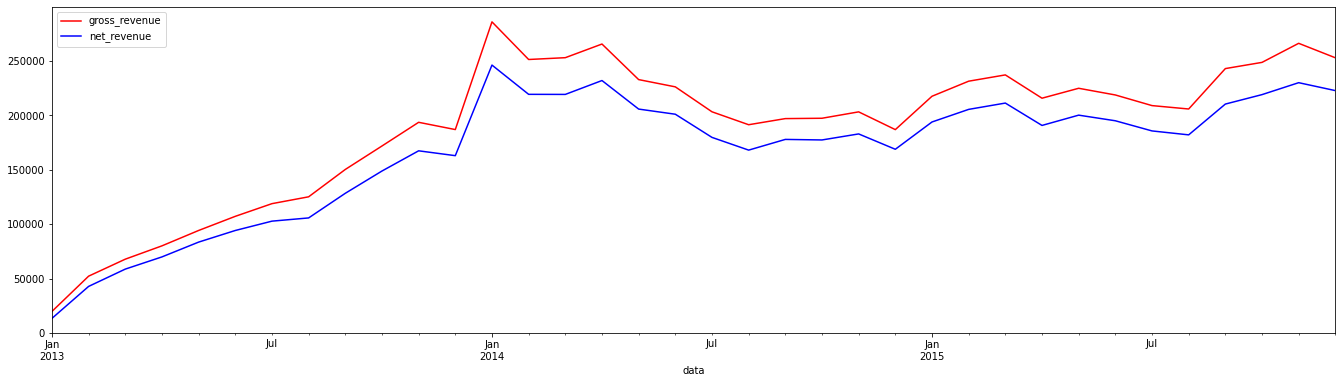

In [ ]:
x.plot(figsize = (23,6), c='red')
y.plot(figsize = (23,6), c='blue')
plt.legend()
plt.show()

Podemos perceber que as vendas subiram bastante no ano de 2013, agora durante 2014 e 2015 não tiveram aumento ou queda significativa. 

Percebe-se também uma sazonalizade, tendo aumento de receita no fim do ano até o primeiro trimestre do ano seguinte, além de queda iniciando em Abril e se estendendo até o fim de Novembro.


Vamos fazer uma decomposição dessa série temporal, para termos mais detalhes de tendência, sazonalizade e ruído.

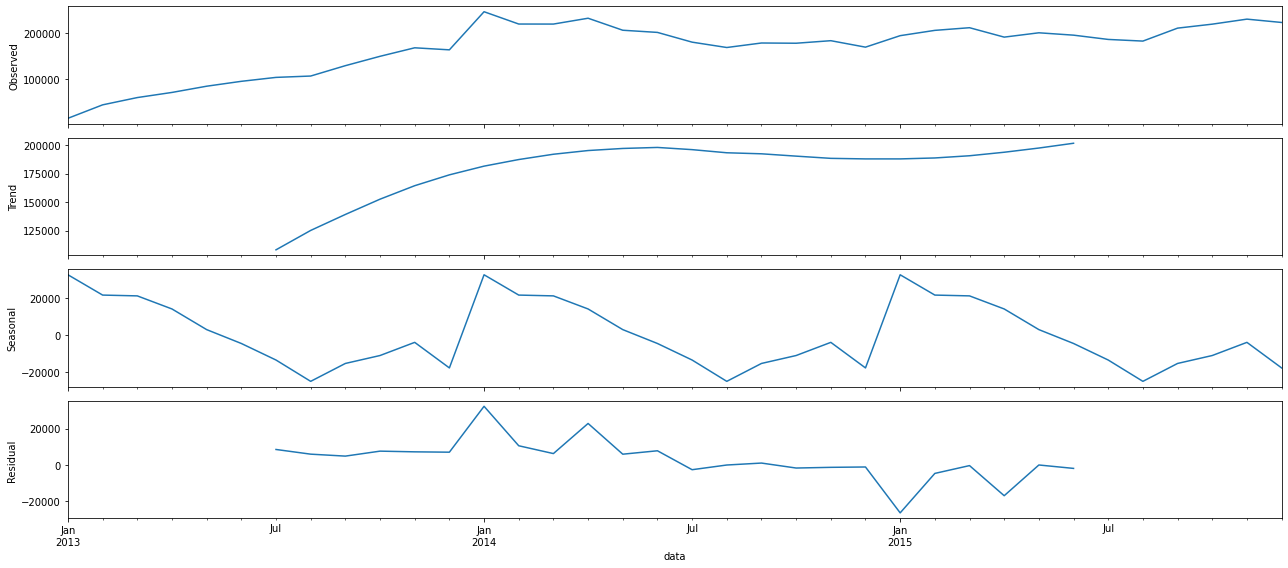

In [ ]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

Observando a decomposição é possível confirmar o que já foi dito antes com mais precisão de detalhes

Teve uma tendência de alta inicial que se estendeu até aproximadamente o fim do primeiro trimestre de 2014 e após esse período as vendas andaram "de lado" não tendo tendência de alta nem de baixa de forma significativa.

Agora com mais clareza se percebe a sazonalidade iniciando sempre no fim do ano e se estendendo até aproximadamente o primeiro trimestre do ano seguinte.

## Preparando ARIMA para estimar os valores de Net_revenue

In [ ]:
import itertools

p = d = q = range(0,2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1],x[2],12) for x in list(itertools.product(p, d, q))]
print('Exemplos de combinação de parâmetros para ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Exemplos de combinação de parâmetros para ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


## Encontrando melhores parâmetros para o ARIMA, usando GridSearchCV

Agora vamos fazer a seleção de parâmetos para o nosso modelo ARIMA, será usado o Grid Search.

In [ ]:
import warnings

warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:948.0426420687626
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:584.9175523053526
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:617.616523561551
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:285.61723578951137
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:901.0616276388477
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:535.8851118027603
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:634.1962665698815
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:290.22137787290484
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:772.8977746300122
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:507.9146823951631
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:510.37803907492287
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:240.97795888061015
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:752.3946018661806
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:486.7056889896335
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:515.4405585617819
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:249.75596169529013
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:797.9881874333806
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:525.1052683191677
ARIMA(

É sugerido o Sarimax (1,1,1)x(1,1,0,12) com AIC de 227.18 por ser o menor valor

## Ajustando o Modelo ARIMA

Vamos usar os parâmetros indicados pelo GridSearchCV, o melhor resultado foi encontrado no AIC 227.

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

## Validando previsões com os dados já Observados

Para analisar a exatidão das nossas previsões, vamos compara-la aos valores observados a partir de Dezembro de 2014

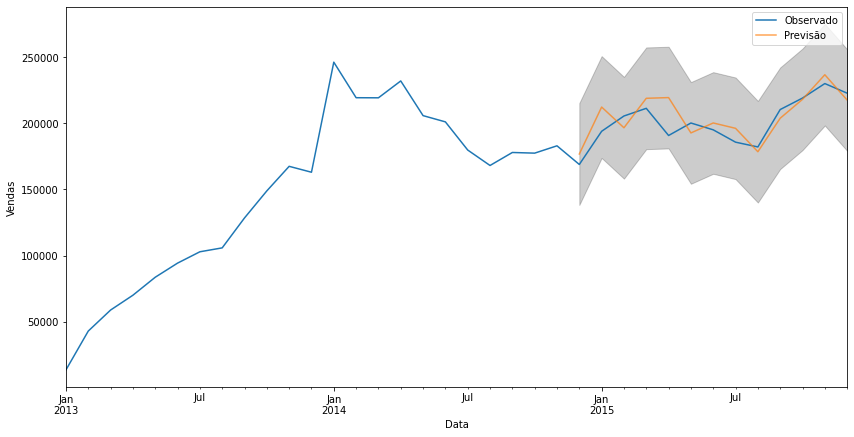

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2014-12-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2013':].plot(label='Observado')
pred.predicted_mean.plot(ax=ax, label='Previsão', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Data')
ax.set_ylabel('Vendas')
plt.legend()
plt.show()

O modelo teve um desempenho razoável, ficou grande parte alinhado com o Observado e capturou a sazonalizadade de fim de ano, desviando um pouco apenas durante aproximadamente 1 mês e meio no começo do ano.


## Avaliando Desempenho do modelo

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['2014-12-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 129332585.15


O MSE está com um valor alto, o que pode representar um modelo viciado.

In [ ]:
import numpy as np

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 11372.45


Root Mean Square Error (RMSE) nos diz que o nosso modelo foi capaz de prever a média diária de vendas no conjunto de teste dentro de 11372.45 das vendas reais. 

Analisando o modelo será necessário fazer ajustes para melhorar o seu desempenho.

## Prevendo 6 meses a frente com o modelo ARIMA

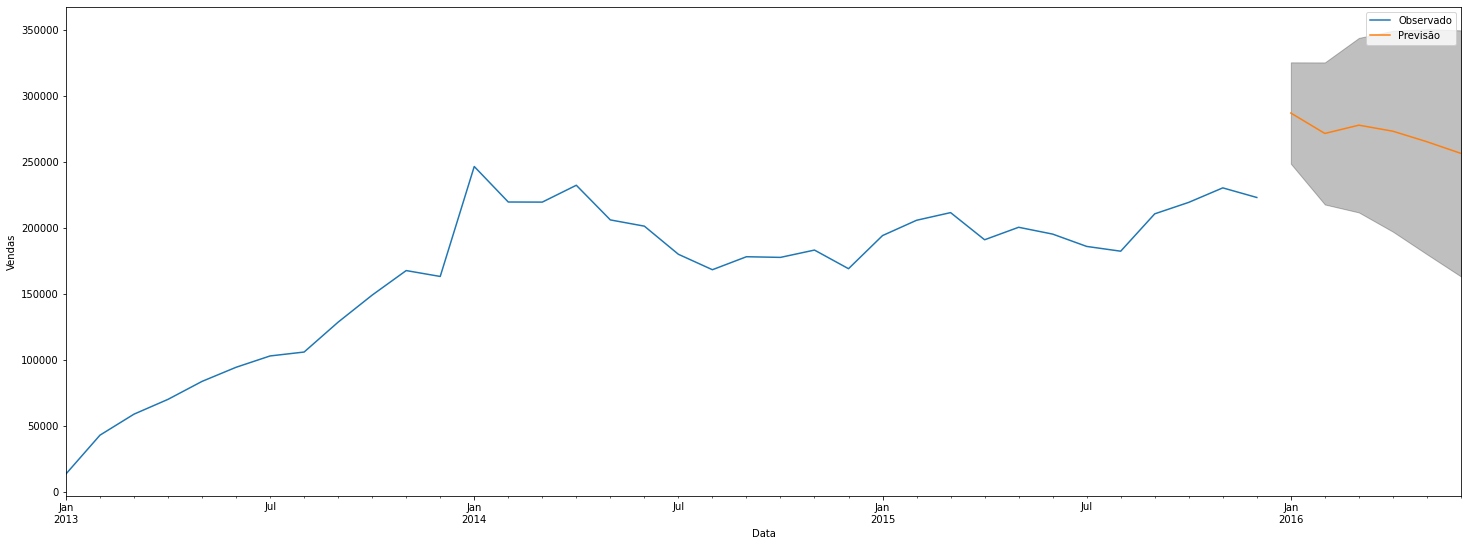

In [ ]:
pred_uc = results.get_forecast(steps=6)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='Observado', figsize=(25, 9))
pred_uc.predicted_mean.plot(ax=ax, label='Previsão')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Data')
ax.set_ylabel('Vendas')
plt.legend()
plt.show()

Abaixo os valores de net_revenue previstos nos próximos 6 meses

In [ ]:
forecast = pred_uc.predicted_mean
forecast.head(6)

2016-01-01    286836.755743
2016-02-01    271375.054726
2016-03-01    277653.196076
2016-04-01    273065.796739
2016-05-01    265105.660406
2016-06-01    256265.883389
Freq: MS, dtype: float64

Abaixo o intervalo máximo e mínimo dos valores Previstos para os próximos 6 meses

In [ ]:
pred_ci.head(6)

,lower net_revenue,upper net_revenue
2016-01-01,248434.039759,325239.471727
2016-02-01,217569.098914,325181.010538
2016-03-01,211550.311560,343756.080591
2016-04-01,196972.693900,349158.899579
2016-05-01,179874.122422,350337.198390
2016-06-01,163071.257617,349460.509161


Há uma certa estranheza minha nesses valores, estão com intervalos de confiança muito altos e valores muito discrepantes de vendas, desconfio que houve um Overfitting.

Vamos fazer uma análise simples para verificar Overfitting

## Verificação de overfitting

Vamos verificar se realmente pode ter um overfitting, primeiro vamos comparar os valores previstos pelo modelo com os dados Observados desde Dezembro de 2014.

Após isso vamos comparar com os valores previstos para os próximos 6 meses e verificar se há uma certa similaridade entre eles.


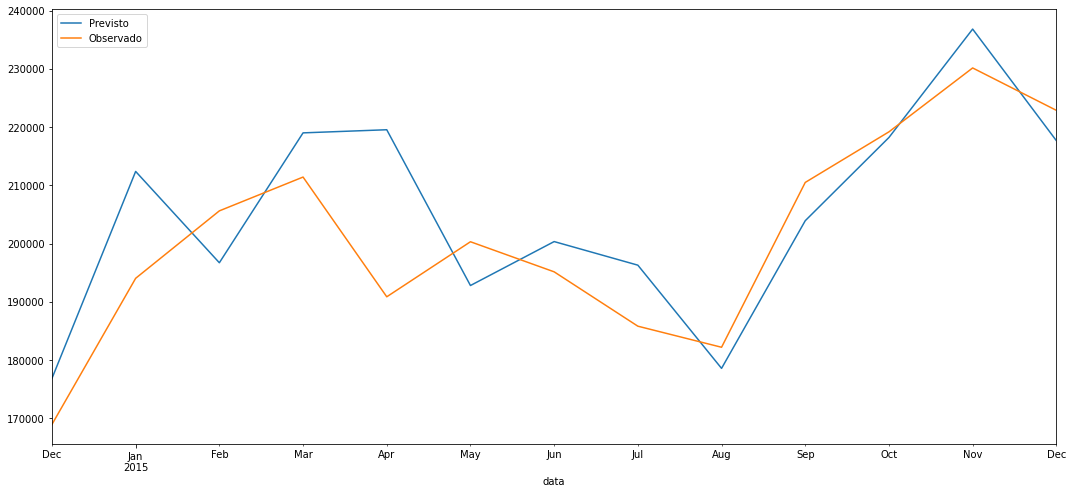

In [ ]:
y_forecasted = pred.predicted_mean
y_forecasted.plot(label = 'Previsto')
y_truth.plot(label = 'Observado')

plt.legend()

plt.show()

Valores Previstos nos dados observados

In [ ]:
y_forecasted

data
2014-12-01    176848.487165
2015-01-01    212391.437741
2015-02-01    196710.527680
2015-03-01    219013.300393
2015-04-01    219550.621183
2015-05-01    192800.621275
2015-06-01    200345.955647
2015-07-01    196295.141728
2015-08-01    178573.376421
2015-09-01    203930.139685
2015-10-01    218222.219624
2015-11-01    236835.044328
2015-12-01    217679.422851
Freq: MS, dtype: float64

Valores Reais dos dados Observados

In [ ]:
y_truth

data
2014-12-01    168945.80
2015-01-01    194039.00
2015-02-01    205620.25
2015-03-01    211425.40
2015-04-01    190863.75
2015-05-01    200316.75
2015-06-01    195150.40
2015-07-01    185817.00
2015-08-01    182198.20
2015-09-01    210502.50
2015-10-01    219192.25
2015-11-01    230161.40
2015-12-01    222882.50
Freq: MS, Name: net_revenue, dtype: float64

Até aqui percebe-se que o modelo teve um desempenho bom nos dados já observados.

Vamos trazer agora os dados previstos para os próximos 6 meses e comparar com o mesmo período dos anos anteriores.

Abaixo os valores previstos para os próximos 6 meses.

In [ ]:
forecast.head(6)

2016-01-01    286836.755743
2016-02-01    271375.054726
2016-03-01    277653.196076
2016-04-01    273065.796739
2016-05-01    265105.660406
2016-06-01    256265.883389
Freq: MS, dtype: float64

Abaixo os valores observados deste mesmo período do ano de 2015

In [ ]:
y_truth.head(7)

data
2014-12-01    168945.80
2015-01-01    194039.00
2015-02-01    205620.25
2015-03-01    211425.40
2015-04-01    190863.75
2015-05-01    200316.75
2015-06-01    195150.40
Freq: MS, Name: net_revenue, dtype: float64

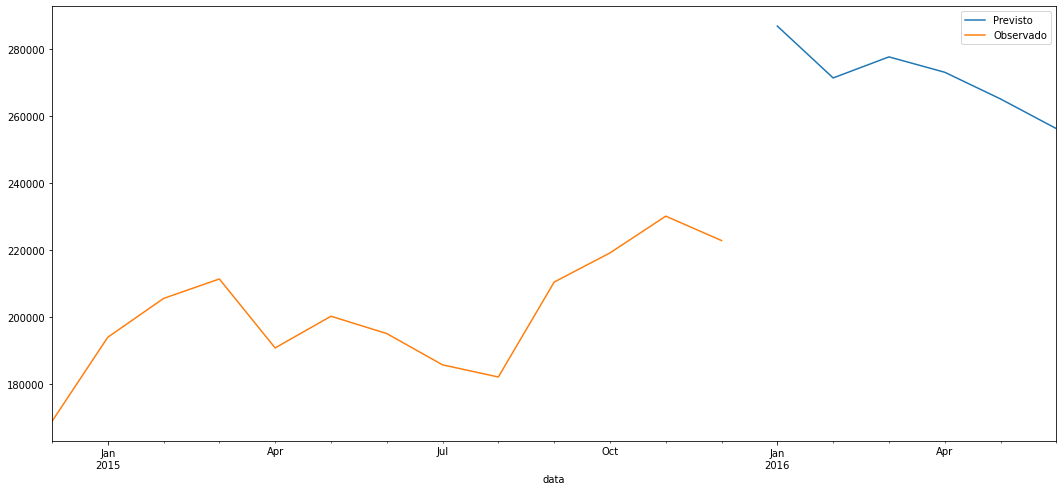

In [ ]:
forecast.plot(label = 'Previsto')
y_truth.plot(label = 'Observado')

plt.legend()

plt.show()

Veja como o previsto teve a curva projetada para cima, dando valores muito altos de net_revenues. Perceba também que o padrão de sazonalidade para o período foi detectado de forma parcial, sendo um pouco suavizado.

## Conclusão Modelo ARIMA

Será necessário um pouco mais de adaptação neste modelo ARIMA para melhorar a sua estimativa, seu MSE e RMSE está alto o que indica pouca precisão.

Provavelmente houve aqui um OverFiting, pois ao analisarmos o desempenho com os dados Observados o seu desempenho foi muito próximo, como visto em um dos gráficos acima, porém quando se prevê para 6 meses a frente observa-se um intervalo de confiança muito grande e as previsões  seguem parcialmente o padrão  de sazonalidade que foi percebido nos dados, o que indica grande variância nos dados.


# 

# Prevendo o net_revenue usando Regressão

Vimos que com o método ARIMA o resultado não foi muito satisfatório, sendo assim, vamos partir para outra técnica chamada de Regressão.

Primeiro vamos começar com um teste básico e logo depois vamos desenvolver melhor o algoritmo

In [ ]:
df1

,customer_id,customer_acquisition_channel,year,week,net_revenue,gross_revenue,boxes,data
0,206461,Paid Marketing,2014,W09,71,71,2,2014-03-03
1,462640,Paid Marketing,2015,W25,28,56,10,2015-06-22
2,666461,Referral,2015,W50,40,40,1,2015-12-14
3,183202,Referral,2013,W42,18,37,1,2013-10-21
4,410993,Referral,2014,W29,0,37,1,2014-07-21
...,...,...,...,...,...,...,...,...
715870,741230,Referral,2015,W51,0,40,1,2015-12-21
715871,170503,Paid Marketing,2015,W25,9,37,1,2015-06-22
715872,169910,Referral,2015,W04,37,37,1,2015-01-26
715873,542301,Paid Marketing,2015,W11,56,56,1,2015-03-16


Para estes testes iniciais vamos selecionar apenas as variáveis year, gross_revenue, boxes e a variável dependente net_revenue

## Testes Iniciais

In [ ]:
#Variáveis independentes
x1 = df1[['year','gross_revenue','boxes']]

#Variável dependente
y1 = df1['net_revenue']

Preparando os conjuntos de treino e teste, usando Hold-out (70-30)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( x1, y1, test_size=0.3)


Verificando o tamanho dos dados de treino e teste

In [ ]:
x_train.shape, y_train.shape

((501112, 3), (501112,))

In [ ]:
x_test.shape, y_test.shape

((214763, 3), (214763,))

Instanciando a Regressão Linear

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lreg = LinearRegression()

In [ ]:
lreg.fit(x_train,y_train)

LinearRegression()

In [ ]:
pred = lreg.predict(x_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 7.34251060834726
MSE: 95.97611459910772
RMSE: 9.796739998545828


In [ ]:
coeff = pd.DataFrame(x_train.columns)
coeff['Coeficientes'] = pd.Series(lreg.coef_)
coeff

,0,Coeficientes
0,year,0.337531
1,gross_revenue,0.970319
2,boxes,0.246202


In [ ]:
lreg.score(x_train,y_train)

0.48513199797368867

In [ ]:
lreg.score(x_test,y_test)

0.4850611564681847

### Conclusão Testes Iniciais

Percebemos que o nosso modelo teve uma acurácia de 48,27% nos dados de teste, ou seja ele é capaz de prever 48,27% dos dados de vendas.

Olhando os coeficientes do modelo percebemos que o gross_revenue é a variável com o maior peso.

Olhando o MSE vemos que o modelo erra em 7,34 o net_revenue.
Agora olhando o RMSE vamos que é maior que o MSE, dando evidências que  teríamos que avaliar quais variáveis penalizam nosso modelo, exclui-las ou transforma-las em combinação com outras variáveis. Além de verificar se há outliers ou se possuímos poucos dados para o modelo.

Sendo assim, vamos tentar melhores este resultado de outras maneiras, segue abaixo.

## Usando Regressão Simples

Vamos fazer um teste com Regressão simples, pois percebemos que a variável gross_revenue foi a que teve maior peso no modelo anterior, sendo assim, vamos fazer utilizando apenas gross_revenue.

In [ ]:
#Variáveis independentes
x2 = df1['gross_revenue']

#Variável dependente
y2 = df1['net_revenue']

In [ ]:
x_train2, x_test2, y_train2, y_test2 = train_test_split( x2, y2, test_size=0.3)

In [ ]:
x_train2.shape, y_train2.shape

((501112,), (501112,))

In [ ]:
x_test2.shape, y_test2.shape

((214763,), (214763,))

In [ ]:
lreg2 = LinearRegression()
x_train2 = x_train2.to_numpy()
x_train2 = x_train2.reshape(-1,1)
y_train2 = y_train2.to_numpy()
y_train2 = y_train2.reshape(-1,1)
lreg2.fit(x_train2,y_train2)

LinearRegression()

In [ ]:
x_test2 = x_test2.to_numpy()
x_test2 = x_test2.reshape(-1,1)
pred2 = lreg2.predict(x_test2)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test2, pred2))
print('MSE:', metrics.mean_squared_error(y_test2, pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test2, pred2)))

MAE: 7.332964188452465
MSE: 95.50048266204686
RMSE: 9.77243483795348


In [ ]:
lreg.score(x_test,y_test)

0.4850611564681847

Percebemos que o nosso modelo teve uma acurácia de 48,89% nos dados de teste, ou seja ele é capaz de prever 48,89% dos dados de vendas.

E comparando com a regressão multivariada o seu desempenho está muito similar.

Vamos tentar melhorar este desempenho fazendo agora uma tratativa em alguamas variáriáveis.

## Pré-processamento nos dados para aplicar a Regressão

Verificando Nulos

In [ ]:
df1.columns

Index(['customer_id', 'customer_acquisition_channel', 'year', 'week',
       'net_revenue', 'gross_revenue', 'boxes', 'data'],
      dtype='object')

Verificando se tem dados Nulos

In [ ]:
df1[['year','customer_acquisition_channel','week','gross_revenue','boxes','data']].isnull().sum()

year                            0
customer_acquisition_channel    0
week                            0
gross_revenue                   0
boxes                           0
data                            0
dtype: int64

Verificando se temos dados zerados

In [ ]:
df1[df1[['year','week','gross_revenue','boxes','data']] == 0].value_counts()

Series([], dtype: int64)

Verificando os dados da coluna categórica customer_acquisition_channel e fazendo LabelEncoder

In [ ]:
df1['customer_acquisition_channel'].value_counts()

Paid Marketing    562941
Referral          152934
Name: customer_acquisition_channel, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(df1.customer_acquisition_channel) 
df1.customer_acquisition_channel = le.transform(df1.customer_acquisition_channel)

In [ ]:
df1['customer_acquisition_channel'].value_counts()

0    562941
1    152934
Name: customer_acquisition_channel, dtype: int64

Vamos fazer o mesmo processo com a coluna Week, e vamos testar a regressão com essa variável e sem ela.

In [ ]:
le.fit(df1.week) 
df1.week = le.transform(df1.week)

In [ ]:
df1

,customer_id,customer_acquisition_channel,year,week,net_revenue,gross_revenue,boxes,data
0,206461,0,2014,8,71,71,2,2014-03-03
1,462640,0,2015,24,28,56,10,2015-06-22
2,666461,1,2015,49,40,40,1,2015-12-14
3,183202,1,2013,41,18,37,1,2013-10-21
4,410993,1,2014,28,0,37,1,2014-07-21
...,...,...,...,...,...,...,...,...
715870,741230,1,2015,50,0,40,1,2015-12-21
715871,170503,0,2015,24,9,37,1,2015-06-22
715872,169910,1,2015,3,37,37,1,2015-01-26
715873,542301,0,2015,10,56,56,1,2015-03-16


Vamos agora ver a correlação entre todas essas variáveis.

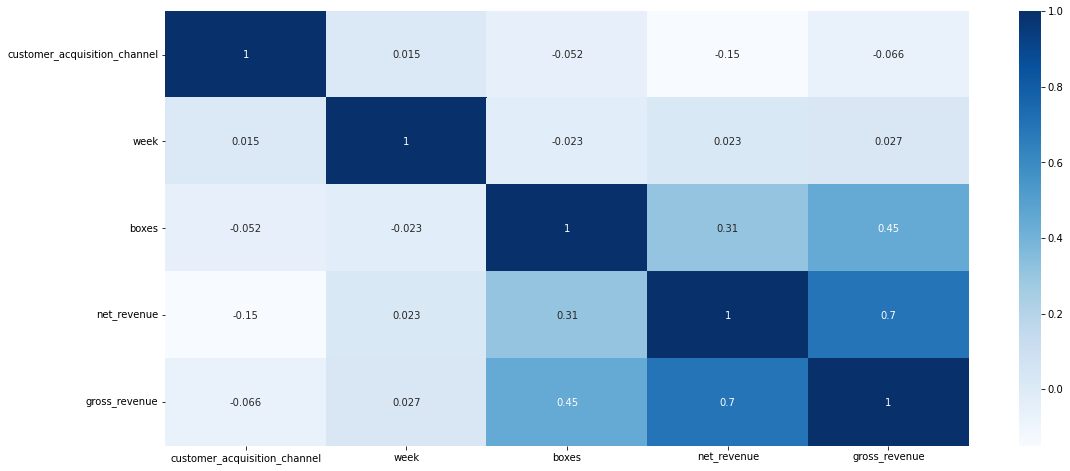

In [ ]:
df_cont=df1[['customer_acquisition_channel','year','week','boxes','net_revenue','gross_revenue']] 
sns.heatmap(df_cont.corr(),annot = True, cmap='Blues')

Não tem uma correlação forte entre customer_acquisiton channel, week e boxes, provavelmente essas variáveis não vão aumentar a precisão do nosso modelo.

## Fazendo outra regressão linear com todos estes parâmetros

In [ ]:
x3 = df1[['customer_acquisition_channel','week','boxes','gross_revenue']]
y3 = df1['net_revenue']

x_train3, x_test3, y_train3, y_test3 = train_test_split( x3, y3, test_size=0.3)

In [ ]:
x_train3.shape,y_train3.shape

((501112, 4), (501112,))

In [ ]:
x_test3.shape,y_test3.shape

((214763, 4), (214763,))

In [ ]:
lreg3 = LinearRegression()
lreg3.fit(x_train3,y_train3)


LinearRegression()

In [ ]:
pred3 = lreg3.predict(x_test3)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test2, pred3))
print('MSE:', metrics.mean_squared_error(y_test2, pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test2, pred3)))

MAE: 11.971088209224776
MSE: 279.1215098461089
RMSE: 16.706929994649194


In [ ]:
coeff = pd.DataFrame(x_train3.columns)
coeff['Coeficientes'] = pd.Series(lreg3.coef_)
coeff

,0,Coeficientes
0,customer_acquisition_channel,-3.485659
1,week,0.005207
2,boxes,-0.115528
3,gross_revenue,0.964817


In [ ]:
lreg3.score(x_test3,y_test3)

0.49729584235266666

Como esperado por conta das baixas correlações, não houve um aumento do R2 do nosso modelo de Regressão Linear, vamos tentar outros tipos de Regressão.

## Testando outros tipos de Regressão

Abaixo segue uma função que já testa automaticamente com os principais tipos de regressão, usando Kfold_cross_validation e já retorna a com melhor resultado.

Referência: https://drigols.medium.com/introdu%C3%A7%C3%A3o-a-valida%C3%A7%C3%A3o-cruzada-k-fold-2a6bced32a90


In [ ]:
def ApplyesKFold(x_axis, y_axis):
  # Linear Models.
  from sklearn.linear_model import LinearRegression
  from sklearn.linear_model import ElasticNet
  from sklearn.linear_model import Ridge
  from sklearn.linear_model import Lasso

  # Cross-Validation models.
  from sklearn.model_selection import cross_val_score
  from sklearn.model_selection import KFold

  # KFold settings.
  kfold  = KFold(n_splits=10, shuffle=True) # shuffle=True, Shuffle (embaralhar) the data.

  # Axis
  x = x_axis
  y = y_axis

  # Models instances.
  linearRegression = LinearRegression()
  elasticNet       = ElasticNet()
  ridge            = Ridge()
  lasso            = Lasso()

  # Applyes KFold to models.
  linearRegression_result = cross_val_score(linearRegression, x, y, cv = kfold)
  elasticNet_result       = cross_val_score(elasticNet, x, y, cv = kfold)
  ridge_result            = cross_val_score(ridge, x, y, cv = kfold)
  lasso_result            = cross_val_score(lasso, x, y, cv = kfold)

  # Creates a dictionary to store Linear Models.
  dic_models = {
    "LinearRegression": linearRegression_result.mean(),
    "ElasticNet": elasticNet_result.mean(),
    "Ridge": ridge_result.mean(),
    "Lasso": lasso_result.mean()
  }
  # Select the best model.
  bestModel = max(dic_models, key=dic_models.get)

  print("Linear Regression Mean (R^2): {0}\nElastic Net Mean (R^2): {1}\nRidge Mean (R^2): {2}\nLasso Mean (R^2): {3}".format(linearRegression_result.mean(), elasticNet_result.mean(), ridge_result.mean(), lasso_result.mean()))
  print("The best model is: {0} with value: {1}".format(bestModel, dic_models[bestModel]))



In [ ]:
ApplyesKFold(x1, y1)

Linear Regression Mean (R^2): 0.48501082826094744
Elastic Net Mean (R^2): 0.48458502136002696
Ridge Mean (R^2): 0.48498488773774373
Lasso Mean (R^2): 0.48466821481430833
The best model is: LinearRegression with value: 0.48501082826094744


In [ ]:
ApplyesKFold(x2, y2)

Linear Regression Mean (R^2): nan
Elastic Net Mean (R^2): nan
Ridge Mean (R^2): nan
Lasso Mean (R^2): nan
The best model is: LinearRegression with value: nan


In [ ]:
ApplyesKFold(x3, y3)

Linear Regression Mean (R^2): 0.49548465179213086
Elastic Net Mean (R^2): 0.4853970253312504
Ridge Mean (R^2): 0.49549443437732654
Lasso Mean (R^2): 0.4845984823737253
The best model is: Ridge with value: 0.49549443437732654


Vemos que mesmo usando outros métodos de Regressão o seu R2 não aumentou de maneira significativa.

Vamos tentar usar o GridSearchCV para achar os melhores parâmetros para Regressão linear e ver se melhora o seu R2

## Fazendo GridSearchCV em Regressão Linear para encontrar os melhores parâmetros

In [ ]:
from sklearn.model_selection import GridSearchCV 

parameters = {'fit_intercept': [True,False], 
'normalize': [True,False], 'copy_X': [True,False], 'n_jobs': [0], 'positive': [True,False] }

search = GridSearchCV(LinearRegression(), parameters, cv=5)

search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [0],
                         'normalize': [True, False],
                         'positive': [True, False]})

Vendo os melhores parâmetros.

In [ ]:
search.best_params_

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': 0,
 'normalize': False,
 'positive': True}

Vendo qual foi o melhor R2.

In [ ]:
search.best_score_

0.48506470493158493

Mesmo assim ainda não tivemos um R2 relevante.

# Verificando OUTLIERS

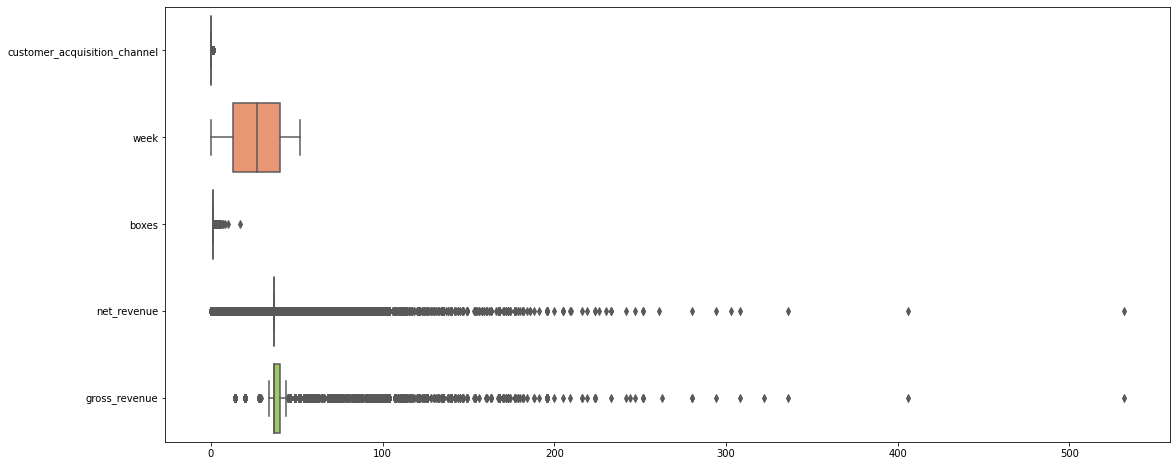

In [ ]:
ax = sns.boxplot(data=df1[['customer_acquisition_channel','year','week','boxes','net_revenue','gross_revenue']], orient="h", palette="Set2")

Não é possível até aqui identificar de maneira eficiente os outliers, visto que tem vários pontos fora dos intervalos das variáveis gross_revenues e boxes.

Vamos usar outros métodos, como:
- método de Tukey
- método z-score
- método do desvio absoluto mediano (MAD)

In [ ]:
# Método de Tukey
def tukeys_method(df, variable):
    # Recebe dois parâmetros: dataframe & variável de interesse como string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    # limites internos
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    # limites externos
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss
        


In [ ]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(df1, "gross_revenue")


In [ ]:
len(probable_outliers_tm)

161811

In [ ]:
len(possible_outliers_tm)

161893

Pelo método de Tukey foi identificado 161.893 registros gross_revenue como outlier.

In [ ]:
df_grossOutliers = df1[['customer_id','gross_revenue']]

In [ ]:
# Método z-score
def z_score_method(df, variable_name):
    from scipy import stats
    # Recebe dois parâmetros: dataframe & variável de interesse como string
    columns = df.columns
    z = np.abs(stats.zscore(df))
    threshold = 3
    outlier = []
    index=0
    for item in range(len(columns)):
        if columns[item] == variable_name:
            index = item
    for i, v in enumerate(z[:, index]):
        if v > threshold:
            outlier.append(i)
        else:
            continue
    return outlier



In [ ]:
outlier_z = z_score_method(df_grossOutliers, "gross_revenue")


In [ ]:
len(outlier_z)

12458

Pelo método do Z-score foi identificado 12.458 outliers

In [ ]:
# Método MAD
def mad_method(df, variable_name):
    # Recebe dois parâmetros: dataframe & variável de interesse como string
    from scipy import stats
    columns = df.columns
    med = np.median(df, axis = 0)
    mad = np.abs(stats.median_absolute_deviation(df))
    threshold = 3
    outlier = []
    index=0
    for item in range(len(columns)):
        if columns[item] == variable_name:
            index == item
    for i, v in enumerate(df.loc[:,variable_name]):
        t = (v-med[index])/mad[index]
        if t > threshold:
            outlier.append(i)
        else:
            continue
    return outlier



In [ ]:
outlier_mad = mad_method(df_grossOutliers, "gross_revenue")



In [ ]:
len(outlier_mad)

0

Método de Tukey com resultados de mais fácil vizualização.

In [ ]:
def outliers(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
    lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
    f = []
    for i in s:
        if i > upper_bound:
            f.append(i)
        elif i < lower_bound:
            f.append(i)
    sums = len(f)
    pros = len(f)/len(s)*100
    d = {'IQR':iqr,
         'Upper Bound':upper_bound,
        'Lower Bound':lower_bound,
        'Sum outliers': sums,'percentage outliers':pros}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    return(d)
    


In [ ]:
outliers(df1.gross_revenue)

,sub,values
0,IQR,3.000000
1,Upper Bound,44.500000
2,Lower Bound,32.500000
3,Sum outliers,161893.000000
4,percentage outliers,22.614702


Veja que cerca de 22,6 % dos dados de gross_revenue são outliers.

Sendo assim, vamos tratá-los limitando os valores destes outliers ao máximo do seu intervalo.

Primeiro criamos as 3 funções para os 3 tipos de tratamento que vou considerar aqui.

Referência: https://ichi.pro/pt/deteccao-e-manipulacao-de-outliers-91750124142970


In [ ]:
def Tukey_limit_outliers(df, variable_name, print_graph = False):
  s = df[variable_name]
  iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
  upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
  lower_bound = np.quantile(s, 0.25)-(1.5*iqr)  
  df[variable_name] = np.where(df[variable_name] > upper_bound,
                               upper_bound,df[variable_name]) #higher
  df[variable_name] = np.where(df[variable_name] < lower_bound, 
                               lower_bound,df[variable_name])
  if print_graph:
    fig,ax = plt.subplots(figsize=(12,6))
    fig = sns.boxplot(df[variable_name])


In [ ]:
def Tukey_drop_outliers(df, variable_name, print_graph = False):
  s = df[variable_name]
  iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
  upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
  lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
  df = df[(df[variable_name] <= upper_bound)]
  if print_graph:
    fig,ax = plt.subplots(figsize=(12,6))
    fig = sns.boxplot(df[variable_name])
  

In [ ]:
def Tukey_replace_outliers(df, variable_name, print_graph = False):
  s = df[variable_name]
  iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
  upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
  lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
  df[variable_name] = df[variable_name].mask(df[variable_name] > upper_bound,df[variable_name].mean())
  df[variable_name] = df[variable_name].mask(df[variable_name] < lower_bound,df[variable_name].mean())
  if print_graph:
    fig,ax = plt.subplots(figsize=(12,6))
    fig = sns.boxplot(df[variable_name])
  
  

Vamos aplicar a função Tukey_limit_outliers nas colunas gross_revenue, net_revenue e boxes.


In [ ]:
df2 = df1.copy()

Tukey_replace_outliers(df2,"gross_revenue")
Tukey_replace_outliers(df2,"net_revenue")
Tukey_replace_outliers(df2,"boxes")

In [ ]:
df2.describe()

,customer_id,customer_acquisition_channel,week,net_revenue,gross_revenue,boxes
count,715875.000000,715875.000000,715875.000000,715875.000000,715875.000000,715875.000000
mean,323664.862498,0.213632,26.491899,34.892853,38.266371,1.001171
std,186136.720066,0.409870,15.105624,2.176857,1.893657,0.006266
min,103.000000,0.000000,0.000000,32.643983,34.000000,1.000000
25%,159325.000000,0.000000,13.000000,32.643983,37.000000,1.000000
50%,289541.000000,0.000000,27.000000,37.000000,37.000000,1.000000
75%,476431.000000,0.000000,40.000000,37.000000,40.000000,1.000000
max,746721.000000,1.000000,52.000000,37.000000,44.000000,1.034710


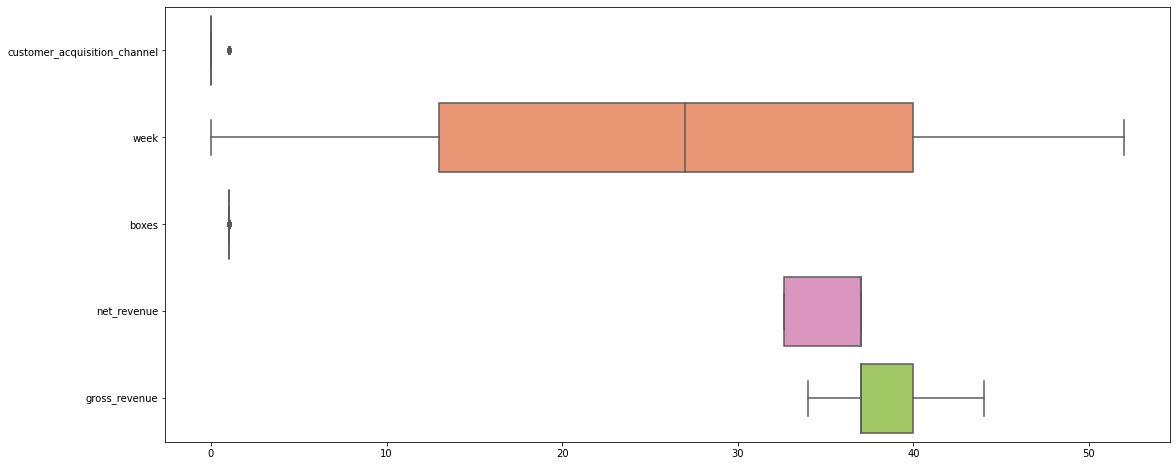

In [ ]:
ax = sns.boxplot(data=df2[['customer_acquisition_channel','year','week','boxes','net_revenue','gross_revenue']], orient="h", palette="Set2")

Percebe-se que agora não temos máis outliers visíveis.

Vamos repetir os modelos para ver se temos melhora no desempenho

# Refazendo os modelos com os dados sem outliers.

## Arima 2

In [ ]:
df2_net = df2.groupby('data')['net_revenue'].sum().reset_index()
df2_gross = df2.groupby('data')['gross_revenue'].sum().reset_index()

In [ ]:
df2_net = df2_net.set_index('data')
df2_gross = df2_gross.set_index('data')

In [ ]:
arima_x2 = df2_gross['gross_revenue'].resample('MS').mean()
arima_y2 = df2_net['net_revenue'].resample('MS').mean()

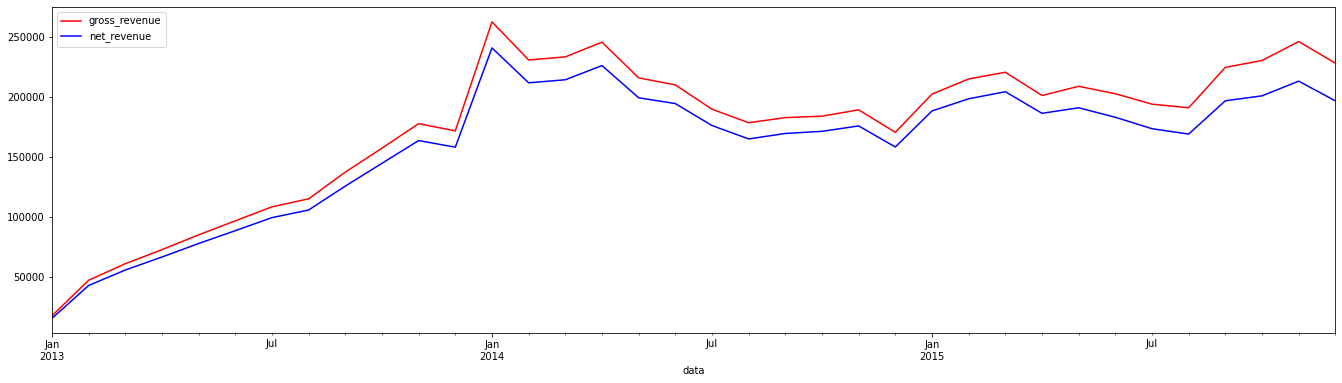

In [ ]:
arima_x2.plot(figsize = (23,6), c='red')
arima_y2.plot(figsize = (23,6), c='blue')
plt.legend()
plt.show()

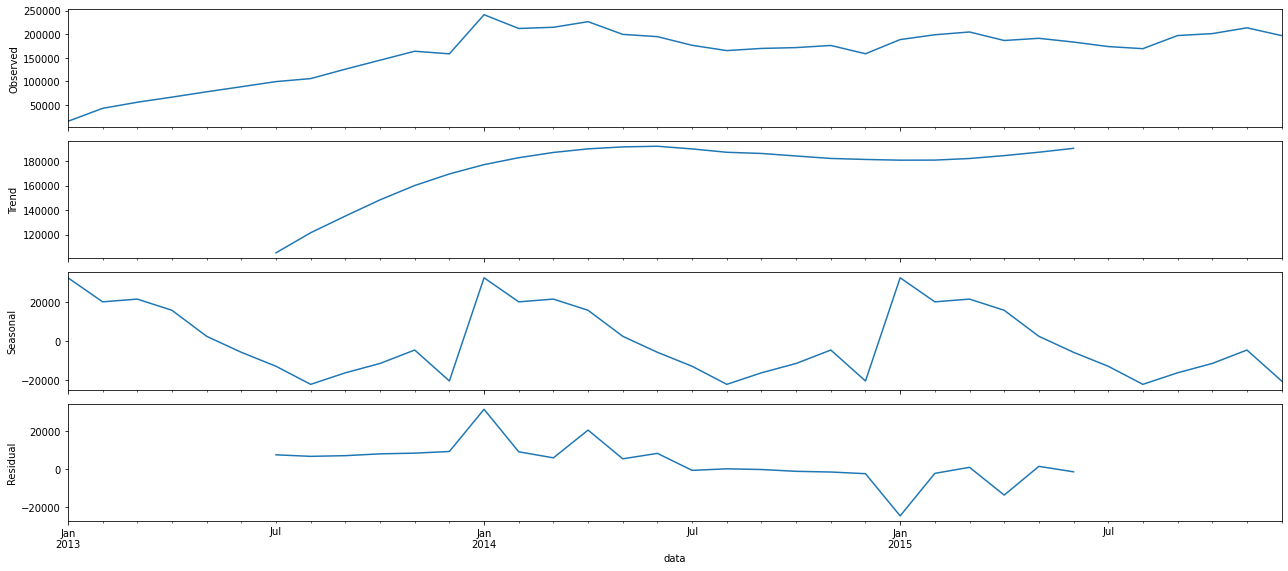

In [ ]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(arima_y2, model='additive')
fig = decomposition.plot()
plt.show()

### Preparando ARIMA para estimar os valores de Net_revenue

In [ ]:
import itertools

p = d = q = range(0,2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1],x[2],12) for x in list(itertools.product(p, d, q))]
print('Exemplos de combinação de parâmetros para ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Exemplos de combinação de parâmetros para ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


### Encontrando melhores parâmetros para o ARIMA, usando GridSearchCV

Agora vamos fazer a seleção de parâmetos para o nosso modelo ARIMA, será usado o Grid Search.

In [ ]:
import warnings

warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(arima_y2,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:944.9845185943378
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:583.2524077715849
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:616.3930017484171
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:279.38621504991227
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:896.4708241068852
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:534.5429324058204
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:632.0696061085453
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:288.7919247522527
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:772.826646023358
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:505.28488250174854
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:511.157872981109
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:241.2744481231286
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:752.2842447188827
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:484.5671100943589
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:515.432969749886
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:248.76717763448482
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:797.9686726803432
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:522.3783363506391
ARIMA(1, 0

É sugerido o Sarimax (1,1,1)x(1,1,0,12) com AIC de 227.50 por ser o menor valor

Vamos usar os parâmetros indicados pelo GridSearchCV, o melhor resultado foi encontrado no AIC 227.

In [ ]:
mod2 = sm.tsa.statespace.SARIMAX(arima_y2,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results2 = mod2.fit()

### Validando previsões com os dados já Observados

Para analisar a exatidão das nossas previsões, vamos compara-la aos valores observados a partir de Dezembro de 2014

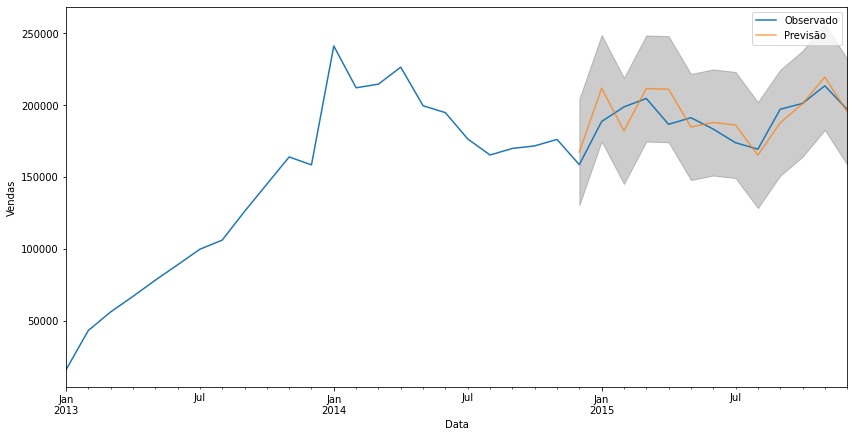

In [ ]:
pred2 = results2.get_prediction(start=pd.to_datetime('2014-12-01'), dynamic=False)
pred_ci2 = pred2.conf_int()
ax = arima_y2['2013':].plot(label='Observado')
pred2.predicted_mean.plot(ax=ax, label='Previsão', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci2.index,
                pred_ci2.iloc[:, 0],
                pred_ci2.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Data')
ax.set_ylabel('Vendas')
plt.legend()
plt.show()

O modelo teve um desempenho razoável, ficou grande parte alinhado com o Observado e capturou a sazonalizadade de fim de ano, desviando um pouco apenas durante aproximadamente 1 mês e meio no começo do ano.


### Avaliando Desempenho do modelo

In [ ]:
y_forecasted2 = pred2.predicted_mean
y_truth2 = arima_y2['2014-12-01':]
mse2 = ((y_forecasted2 - y_truth2) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse2, 2)))

The Mean Squared Error of our forecasts is 145748461.9


O MSE está com um valor alto, o que pode representar um modelo viciado.

In [ ]:
import numpy as np

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse2), 2)))

The Root Mean Squared Error of our forecasts is 12072.63


Root Mean Square Error (RMSE) nos diz que o nosso modelo foi capaz de prever a média diária de vendas no conjunto de teste dentro de 11372.45 das vendas reais. 

Analisando o modelo será necessário fazer ajustes para melhorar o seu desempenho.

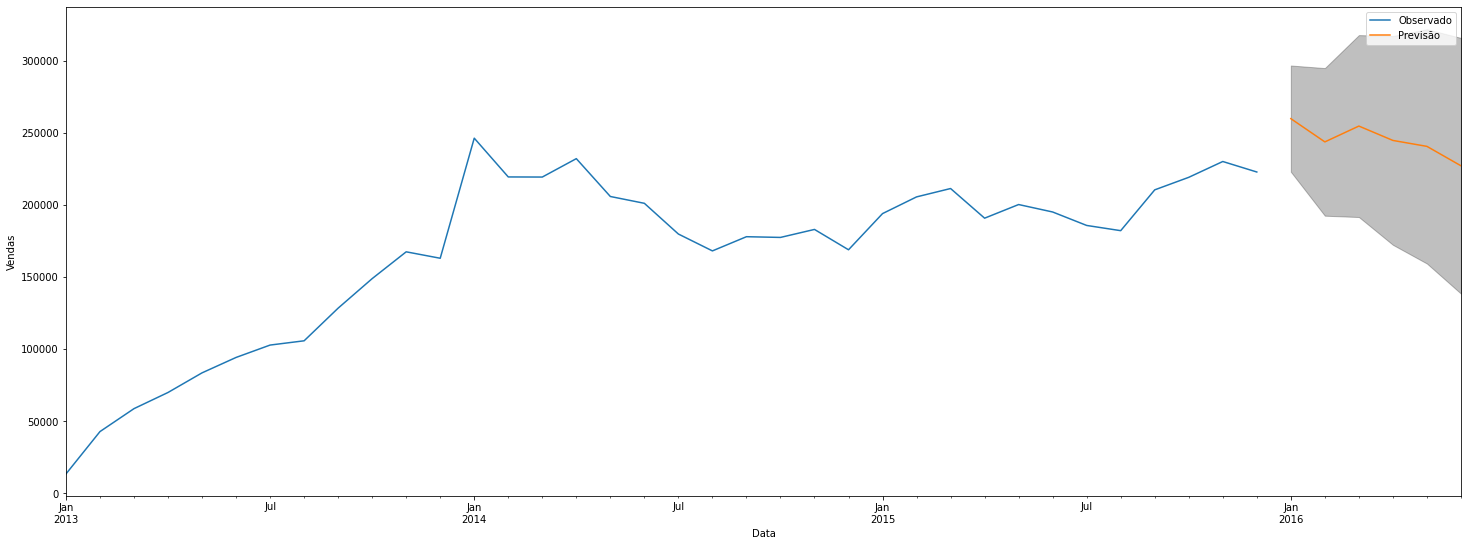

In [ ]:
pred_uc2 = results2.get_forecast(steps=6)
pred_ci2 = pred_uc2.conf_int()
ax = y.plot(label='Observado', figsize=(25, 9))
pred_uc2.predicted_mean.plot(ax=ax, label='Previsão')
ax.fill_between(pred_ci2.index,
                pred_ci2.iloc[:, 0],
                pred_ci2.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Data')
ax.set_ylabel('Vendas')
plt.legend()
plt.show()

Abaixo os valores de net_revenue previstos nos próximos 6 meses

In [ ]:
forecast2 = pred_uc2.predicted_mean
forecast2.head(6)

2016-01-01    259878.880313
2016-02-01    243757.556312
2016-03-01    254734.248297
2016-04-01    244769.951264
2016-05-01    240654.074602
2016-06-01    227197.885553
Freq: MS, dtype: float64

Abaixo o intervalo máximo e mínimo dos valores Previstos para os próximos 6 meses

In [ ]:
pred_ci2.head(6)

,lower net_revenue,upper net_revenue
2016-01-01,223024.043193,296733.717434
2016-02-01,192566.949739,294948.162886
2016-03-01,191644.889983,317823.606611
2016-04-01,172375.383408,317164.519120
2016-05-01,159399.412400,321908.736804
2016-06-01,138532.855305,315862.915801


Há uma certa estranheza minha nesses valores, estão com intervalos de confiança muito altos e valores muito discrepantes de vendas, desconfio que houve um Overfitting.

Vamos fazer uma análise simples para verificar Overfitting

### Verificação de overfitting

Vamos verificar se realmente pode ter um overfitting, primeiro vamos comparar os valores previstos pelo modelo com os dados Observados desde Dezembro de 2014.

Após isso vamos comparar com os valores previstos para os próximos 6 meses e verificar se há uma certa similaridade entre eles.


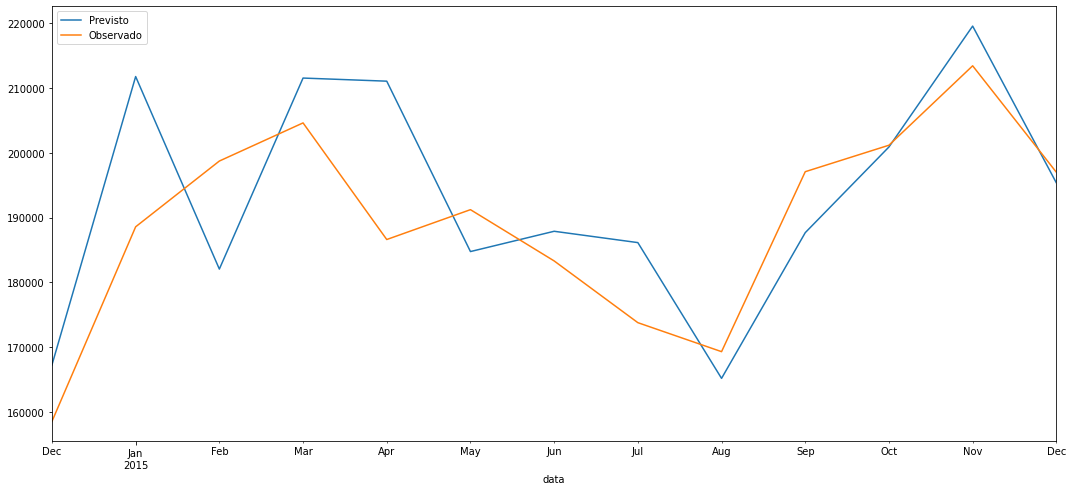

In [ ]:
y_forecasted2 = pred2.predicted_mean
y_forecasted2.plot(label = 'Previsto')
y_truth2.plot(label = 'Observado')

plt.legend()

plt.show()

Valores Previstos nos dados observados

In [ ]:
y_forecasted2

data
2014-12-01    167276.633609
2015-01-01    211737.153881
2015-02-01    182050.976331
2015-03-01    211502.926412
2015-04-01    211023.330301
2015-05-01    184751.885718
2015-06-01    187879.458975
2015-07-01    186132.500540
2015-08-01    165198.986320
2015-09-01    187666.096947
2015-10-01    200879.033094
2015-11-01    219516.416386
2015-12-01    195344.827034
Freq: MS, dtype: float64

Valores Reais dos dados Observados

In [ ]:
y_truth2

data
2014-12-01    158559.884260
2015-01-01    188568.897861
2015-02-01    198709.093079
2015-03-01    204588.667977
2015-04-01    186608.043708
2015-05-01    191211.895155
2015-06-01    183307.067640
2015-07-01    173788.388508
2015-08-01    169317.911945
2015-09-01    197065.349680
2015-10-01    201147.435361
2015-11-01    213393.577794
2015-12-01    196983.691578
Freq: MS, Name: net_revenue, dtype: float64

Até aqui percebe-se que o modelo teve um desempenho bom nos dados já observados.

Vamos trazer agora os dados previstos para os próximos 6 meses e comparar com o mesmo período dos anos anteriores.

Abaixo os valores previstos para os próximos 6 meses.

In [ ]:
forecast2.head(6)

2016-01-01    259878.880313
2016-02-01    243757.556312
2016-03-01    254734.248297
2016-04-01    244769.951264
2016-05-01    240654.074602
2016-06-01    227197.885553
Freq: MS, dtype: float64

Abaixo os valores observados deste mesmo período do ano de 2015

In [ ]:
y_truth2.head(7)

data
2014-12-01    158559.884260
2015-01-01    188568.897861
2015-02-01    198709.093079
2015-03-01    204588.667977
2015-04-01    186608.043708
2015-05-01    191211.895155
2015-06-01    183307.067640
Freq: MS, Name: net_revenue, dtype: float64

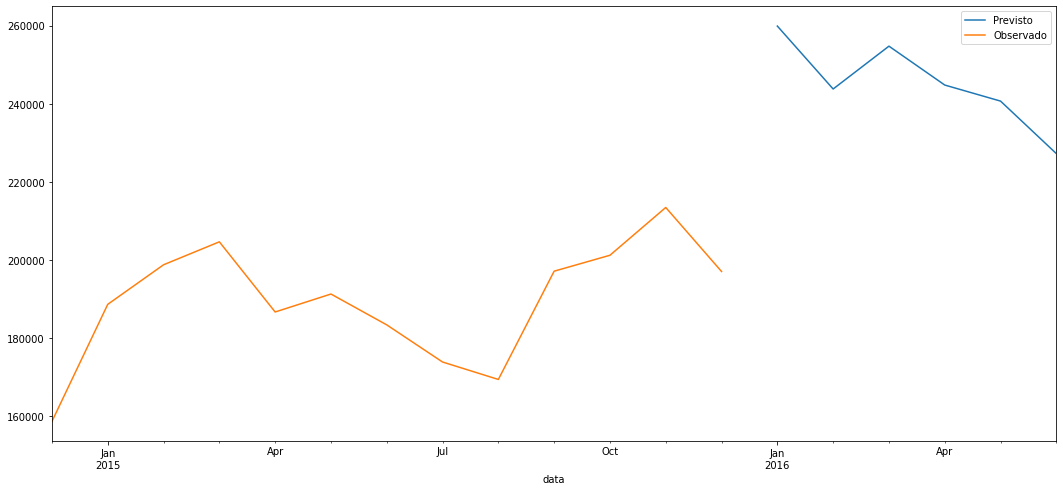

In [ ]:
forecast2.plot(label = 'Previsto')
y_truth2.plot(label = 'Observado')

plt.legend()

plt.show()

Mesmo removendo os outliers o modelo ARIMA 2 continua não se encaixando tão bem aos dados.


### Conclusão Modelo ARIMA 2

Será necessário um pouco mais de adaptação neste modelo ARIMA para melhorar a sua estimativa, seu MSE e RMSE está alto o que indica pouca precisão.

Mesmo retirando os outliers o Modelo ARIMA 2 não teve um bom desempenho, aliás foi muito similar ao ARIMA 1.


# Usando Regressao 2

Vimos que com o método ARIMA 2  o resultado também não foi muito satisfatório, sendo assim, vamos fazer o mesmo com a Regrassão 2, usando agora os dados sem outliers.

Primeiro vamos começar com um teste básico e logo depois vamos desenvolver melhor o algoritmo

In [ ]:
df2

,customer_id,customer_acquisition_channel,year,week,net_revenue,gross_revenue,boxes,data
0,206461,0,2014,8,32.643983,41.430585,1.03471,2014-03-03
1,462640,0,2015,24,32.643983,41.430585,1.03471,2015-06-22
2,666461,1,2015,49,32.643983,40.000000,1.00000,2015-12-14
3,183202,1,2013,41,32.643983,37.000000,1.00000,2013-10-21
4,410993,1,2014,28,32.643983,37.000000,1.00000,2014-07-21
...,...,...,...,...,...,...,...,...
715870,741230,1,2015,50,32.643983,40.000000,1.00000,2015-12-21
715871,170503,0,2015,24,32.643983,37.000000,1.00000,2015-06-22
715872,169910,1,2015,3,37.000000,37.000000,1.00000,2015-01-26
715873,542301,0,2015,10,32.643983,41.430585,1.00000,2015-03-16


Para estes testes iniciais vamos selecionar apenas as variáveis year, gross_revenue, boxes e a variável dependente net_revenue

## Testes Iniciais

In [ ]:
#Variáveis independentes
df2_x1 = df2[['year','gross_revenue','boxes']]

#Variável dependente
df2_y1 = df2['net_revenue']

Preparando os conjuntos de treino e teste, usando Hold-out (70-30)

In [ ]:
from sklearn.model_selection import train_test_split

df2_x_train, df2_x_test, df2_y_train, df2_y_test = train_test_split( df2_x1, df2_y1, test_size=0.3, random_state = 10)


Verificando o tamanho dos dados de treino e teste

In [ ]:
df2_x_train.shape, df2_y_train.shape

((501112, 3), (501112,))

In [ ]:
df2_x_test.shape, df2_y_test.shape

((214763, 3), (214763,))

Instanciando a Regressão Linear

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

df2_lreg = LinearRegression()

In [ ]:
df2_lreg.fit(df2_x_train,df2_y_train)

LinearRegression()

In [ ]:
df2_pred = df2_lreg.predict(df2_x_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(df2_y_test, df2_pred))
print('MSE:', metrics.mean_squared_error(df2_y_test, df2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(df2_y_test, df2_pred)))

MAE: 1.3048609395646031
MSE: 2.6882072586352708
RMSE: 1.6395753287468284


In [ ]:
coeff = pd.DataFrame(df2_x_train.columns)
coeff['Coeficientes'] = pd.Series(df2_lreg.coef_)
coeff

,0,Coeficientes
0,year,0.054479
1,gross_revenue,-0.765888
2,boxes,9.637934


In [ ]:
df2_lreg.score(df2_x_train,df2_y_train)

0.42987273849387597

In [ ]:
lreg.score(df2_x_test,df2_y_test)

-2.3817417265494867

### Conclusão Testes Iniciais

Percebemos que o nosso modelo teve uma acurácia de 48,27% nos dados de teste, ou seja ele é capaz de prever 48,27% dos dados de vendas.

Olhando os coeficientes do modelo percebemos que o gross_revenue é a variável com o maior peso.

Olhando o MSE vemos que o modelo erra em 7,34 o net_revenue.
Agora olhando o RMSE vamos que é maior que o MSE, dando evidências que  teríamos que avaliar quais variáveis penalizam nosso modelo, exclui-las ou transforma-las em combinação com outras variáveis. Além de verificar se há outliers ou se possuímos poucos dados para o modelo.

Sendo assim, vamos tentar melhores este resultado de outras maneiras, segue abaixo.

## Usando Regressão Simples

Vamos fazer um teste com Regressão simples, pois percebemos que a variável gross_revenue foi a que teve maior peso no modelo anterior, sendo assim, vamos fazer utilizando apenas gross_revenue.

In [ ]:
df2_y1.value_counts()

37.000000    369583
32.643983    346292
Name: net_revenue, dtype: int64

In [ ]:
#Variáveis independentes
df2_x2 = df2['gross_revenue']

#Variável dependente
df2_y2 = df2['net_revenue']

In [ ]:
df2_x_train2, df2_x_test2, df2_y_train2, df2_y_test2 = train_test_split( df2_x2, df2_y2, test_size=0.3, random_state= 10)

In [ ]:
df2_x_train2.shape, df2_y_train2.shape

((501112,), (501112,))

In [ ]:
df2_x_test2.shape, df2_y_test2.shape

((214763,), (214763,))

In [ ]:
df2_lreg2 = LinearRegression()
df2_x_train2 = df2_x_train2.to_numpy()
df2_x_train2 = df2_x_train2.reshape(-1,1)
df2_y_train2 = df2_y_train2.to_numpy()
df2_y_train2 = df2_y_train2.reshape(-1,1)
df2_lreg2.fit(df2_x_train2,df2_y_train2)

LinearRegression()

In [ ]:
df2_x_test2 = df2_x_test2.to_numpy()
df2_x_test2 = df2_x_test2.reshape(-1,1)
df2_pred2 = df2_lreg2.predict(x_test2)

In [ ]:
print('MAE:', metrics.mean_absolute_error(df2_y_test2, df2_pred2))
print('MSE:', metrics.mean_squared_error(df2_y_test2, df2_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(df2_y_test2, df2_pred2)))

MAE: 4.827673667768122
MSE: 64.33386381433479
RMSE: 8.020839345999569


In [ ]:
df2_lreg2.score(df2_x_test2,df2_y_test2)

0.4318777746834007

Percebemos que o nosso modelo teve uma acurácia de 48,89% nos dados de teste, ou seja ele é capaz de prever 48,89% dos dados de vendas.

E comparando com a regressão multivariada o seu desempenho está muito similar.

Vamos tentar melhorar este desempenho fazendo agora uma tratativa em alguamas variáriáveis.

## Fazendo outra regressão linear com todos estes parâmetros

In [ ]:
df2_x3 = df2[['customer_acquisition_channel','week','boxes','gross_revenue']]
df2_y3 = df2['net_revenue']

df2_x_train3, df2_x_test3, df2_y_train3, df2_y_test3 = train_test_split( df2_x3, df2_y3, test_size=0.3)

In [ ]:
df2_x_train3.shape,df2_y_train3.shape

((501112, 4), (501112,))

In [ ]:
df2_x_test3.shape,df2_y_test3.shape

((214763, 4), (214763,))

In [ ]:
df2_lreg3 = LinearRegression()
df2_lreg3.fit(df2_x_train3,df2_y_train3)


LinearRegression()

In [ ]:
df2_pred3 = df2_lreg3.predict(df2_x_test3)

In [ ]:
print('MAE:', metrics.mean_absolute_error(df2_y_test2, df2_pred3))
print('MSE:', metrics.mean_squared_error(df2_y_test2, df2_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(df2_y_test2, df2_pred3)))

MAE: 2.213135071507214
MSE: 6.8013724565001805
RMSE: 2.6079441053251466


In [ ]:
df2_coeff = pd.DataFrame(df2_x_train3.columns)
df2_coeff['Coeficientes'] = pd.Series(df2_lreg3.coef_)
df2_coeff

,0,Coeficientes
0,customer_acquisition_channel,0.003512
1,week,0.000277
2,boxes,8.428816
3,gross_revenue,-0.762434


In [ ]:
df2_lreg3.score(df2_x_test3,df2_y_test3)

0.4314236282935965

Como esperado por conta das baixas correlações, não houve um aumento do R2 do nosso modelo de Regressão Linear, vamos tentar outros tipos de Regressão.

## Testando outros tipos de Regressão

Abaixo segue uma função que já testa automaticamente com os principais tipos de regressão, usando Kfold_cross_validation e já retorna a com melhor resultado.

Referência: https://drigols.medium.com/introdu%C3%A7%C3%A3o-a-valida%C3%A7%C3%A3o-cruzada-k-fold-2a6bced32a90


In [ ]:
def ApplyesKFold(x_axis, y_axis):
  # Linear Models.
  from sklearn.linear_model import LinearRegression
  from sklearn.linear_model import ElasticNet
  from sklearn.linear_model import Ridge
  from sklearn.linear_model import Lasso

  # Cross-Validation models.
  from sklearn.model_selection import cross_val_score
  from sklearn.model_selection import KFold

  # KFold settings.
  kfold  = KFold(n_splits=10, shuffle=True) # shuffle=True, Shuffle (embaralhar) the data.

  # Axis
  x = x_axis
  y = y_axis

  # Models instances.
  linearRegression = LinearRegression()
  elasticNet       = ElasticNet()
  ridge            = Ridge()
  lasso            = Lasso()

  # Applyes KFold to models.
  linearRegression_result = cross_val_score(linearRegression, x, y, cv = kfold)
  elasticNet_result       = cross_val_score(elasticNet, x, y, cv = kfold)
  ridge_result            = cross_val_score(ridge, x, y, cv = kfold)
  lasso_result            = cross_val_score(lasso, x, y, cv = kfold)

  # Creates a dictionary to store Linear Models.
  dic_models = {
    "LinearRegression": linearRegression_result.mean(),
    "ElasticNet": elasticNet_result.mean(),
    "Ridge": ridge_result.mean(),
    "Lasso": lasso_result.mean()
  }
  # Select the best model.
  bestModel = max(dic_models, key=dic_models.get)

  print("Linear Regression Mean (R^2): {0}\nElastic Net Mean (R^2): {1}\nRidge Mean (R^2): {2}\nLasso Mean (R^2): {3}".format(linearRegression_result.mean(), elasticNet_result.mean(), ridge_result.mean(), lasso_result.mean()))
  print("The best model is: {0} with value: {1}".format(bestModel, dic_models[bestModel]))



In [ ]:
ApplyesKFold(df2_x1, df2_y1)

Linear Regression Mean (R^2): 0.4307283725460366
Elastic Net Mean (R^2): 0.3949804082937313
Ridge Mean (R^2): 0.4307341733966762
Lasso Mean (R^2): 0.37098750171900424
The best model is: Ridge with value: 0.4307341733966762


In [ ]:
ApplyesKFold(df2_x2, df2_y2)

Linear Regression Mean (R^2): nan
Elastic Net Mean (R^2): nan
Ridge Mean (R^2): nan
Lasso Mean (R^2): nan
The best model is: LinearRegression with value: nan


In [ ]:
ApplyesKFold(df2_x3,df2_y3)

Linear Regression Mean (R^2): 0.4303765575770145
Elastic Net Mean (R^2): 0.39498368509919884
Ridge Mean (R^2): 0.43037030949257604
Lasso Mean (R^2): 0.3709742683217957
The best model is: LinearRegression with value: 0.4303765575770145


Vemos que mesmo usando outros métodos de Regressão o seu R2 não aumentou de maneira significativa.

Vamos tentar usar o GridSearchCV para achar os melhores parâmetros para Regressão linear e ver se melhora o seu R2

## Fazendo GridSearchCV em Regressão Linear para encontrar os melhores parâmetros

In [ ]:
from sklearn.model_selection import GridSearchCV 

parameters = {'fit_intercept': [True,False], 
'normalize': [True,False], 'copy_X': [True,False], 'n_jobs': [0], 'positive': [True,False] }

search = GridSearchCV(LinearRegression(), parameters, cv=5)

search.fit(df2_x_train, df2_y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [0],
                         'normalize': [True, False],
                         'positive': [True, False]})

Vendo os melhores parâmetros.

In [ ]:
search.best_params_

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': 0,
 'normalize': False,
 'positive': False}

Vendo qual foi o melhor R2.

In [ ]:
search.best_score_

0.42986377666512976

Mesmo assim ainda não tivemos um R2 relevante.

# Conclusão Geral

Primeiro foi feita uma análise descritiva e exploratória dos dados, onde identificou-se as variáveis, os tipos de variáveis e certas relações entre elas, trazendo informações relevantes a respeito dos dados e do comportamento do negócio que podem ser verificadas nos primeiros pontos deste projeto.

Logo após, foi usado Series Temporais através do ARIMA para tentar estimar o valor de vendas futuras. O Arima não se mostrou muito eficiente de primeira, logo então, tentou-se melhorar os seus parâmetros usando GridSearchCV. Mesmo com isso o desempenho não foi muito interessante, tendo um intervalo de confiança muito alto, indicando muita variância entre os dados, fora os valores de Erro Médio altos.

Então partiu-se para a regressão linear, tanto simples quanto composta e ambas não tiveram um R2 relevante, ficando sempre entre R2 = 0,48 ~0,49. Mesmo usando outros tipos de Regressão como ElasticNet,Ridge e Lasso e GridSearchCV para seleção dos melhores parâmetros o resultado não teve melhora significativa.

Após esse processo fizemos limpeza de outliers , os substituindo pela média de cada coluna. Substituimos os outliers de net_revenue, gorss_revenue e boxes.

E depois dessa limpeza de outliers refizemos os mesmos algoritmos e por incrível que pareça o desempenho de todos caiu cerca de 5%, mostrando que esta técnica não foi eficiente para esses dados.

Sendo assim, será necessário mais tempo para testar outras técnicas e modelos de Regressão e tratamento de dados.
